In [4]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
#Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'15',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  #print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

In [5]:
type(data)

dict

In [6]:
import pandas as pd


#This allows you to see all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [7]:
#This normalizes the data and makes it all pretty in a dataframe

df = pd.json_normalize(data['data'])
df['timestamp'] = pd.to_datetime('now')
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916136e+07,1.916136e+07,NaN,1,NaN,NaN,None,2022-09-26T18:55:00.000Z,19176.104161,4.311935e+10,88.2716,0.268494,1.272529,0.452103,-3.991086,-19.427001,-5.918299,3.674402e+11,39.2420,4.026982e+11,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284
1,1027,Ethereum,ETH,ethereum,6106,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225376e+08,1.225376e+08,NaN,2,NaN,NaN,None,2022-09-26T18:55:00.000Z,1329.366415,1.620457e+10,43.3184,0.421480,2.808718,-0.665423,-9.595129,-22.830333,14.059499,1.628973e+11,17.4106,1.628973e+11,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284
2,825,Tether,USDT,tether,40119,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795600e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.999997,5.711231e+10,65.1516,-0.003221,-0.006535,-0.006821,-0.004257,-0.020420,0.114142,6.795581e+10,7.2586,7.015526e+10,None,2022-09-26T18:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-26 18:58:11.607284
3,3408,USD Coin,USDC,usd-coin,6334,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.940246e+10,4.940246e+10,NaN,4,NaN,NaN,None,2022-09-26T18:55:00.000Z,1.000149,4.097595e+09,9.0174,-0.002093,-0.006396,0.010657,0.015782,0.043101,-0.019159,4.940982e+10,5.2761,4.940982e+10,None,2022-09-26T18:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-26 18:58:11.607284
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-26T18:55:00.000Z,274.724789,7.507286e+08,17.5083,-0.176606,-0.183893,3.221650,-0.871630,-0.230676,17.554555,4.432335e+10,4.7337,5.494496e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284
5,52,XRP,XRP,xrp,821,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.475453,3.240306e+09,-6.7182,1.143989,-4.861092,24.761907,42.161042,28.537932,39.141022,2.370076e+10,2.5312,4.754534e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284
6,4687,Binance USD,BUSD,binance-usd,5182,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.103965e+10,NaN,7,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.999998,8.406446e+09,28.3271,-0.157873,0.006183,0.005705,0.012627,-0.067659,-0.052962,2.051721e+10,2.1912,2.103961e+10,None,2022-09-26T18:55:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-26 18:58:11.607284
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.423642e+10,3.495058e+10,NaN,8,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.446270,6.775052e+08,34.2898,0.095129,-0.843519,-0.516520,0.962633,-12.600881,-6.107536,1.527868e+10,1.6330,2.008215e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.547828e+08,5.116169e+08,NaN,9,NaN,NaN,None,

In [8]:
def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest' 
    #Original Sandbox Environment: 'https://sandbox-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'15',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '0ad53085-1cb2-4eb8-ad9e-3ffbd7e56509',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      #print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)

#NOTE:
# I had to go in and put "jupyter notebook --NotebookApp.iopub_data_rate_limit=1e10"
# Into the Anaconda Prompt to change this to allow to pull data
    
    # Use this if you just want to keep it in a dataframe
    df2 = pd.json_normalize(data['data'])
    df2['Timestamp'] = pd.to_datetime('now')
    df = df.append(df2)

In [9]:
from time import time
from time import sleep

for i in range(333):
    api_runner()
    print('API Runner completed')
    sleep(60) #sleep for 1 minute
exit()

API Runner completed
API Runner completed


KeyboardInterrupt: 

In [10]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,tvl_ratio,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.tvl,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp,Timestamp
0,1,Bitcoin,BTC,bitcoin,9748,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.916136e+07,1.916136e+07,NaN,1,NaN,NaN,None,2022-09-26T18:55:00.000Z,19176.104161,4.311935e+10,88.2716,0.268494,1.272529,0.452103,-3.991086,-19.427001,-5.918299,3.674402e+11,39.2420,4.026982e+11,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284,NaT
1,1027,Ethereum,ETH,ethereum,6106,2015-08-07T00:00:00.000Z,"[pos, smart-contracts, ethereum-ecosystem, coi...",NaN,1.225376e+08,1.225376e+08,NaN,2,NaN,NaN,None,2022-09-26T18:55:00.000Z,1329.366415,1.620457e+10,43.3184,0.421480,2.808718,-0.665423,-9.595129,-22.830333,14.059499,1.628973e+11,17.4106,1.628973e+11,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284,NaT
2,825,Tether,USDT,tether,40119,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,6.795600e+10,7.015545e+10,NaN,3,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.999997,5.711231e+10,65.1516,-0.003221,-0.006535,-0.006821,-0.004257,-0.020420,0.114142,6.795581e+10,7.2586,7.015526e+10,None,2022-09-26T18:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-09-26 18:58:11.607284,NaT
3,3408,USD Coin,USDC,usd-coin,6334,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,4.940246e+10,4.940246e+10,NaN,4,NaN,NaN,None,2022-09-26T18:55:00.000Z,1.000149,4.097595e+09,9.0174,-0.002093,-0.006396,0.010657,0.015782,0.043101,-0.019159,4.940982e+10,5.2761,4.940982e+10,None,2022-09-26T18:55:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-09-26 18:58:11.607284,NaT
4,1839,BNB,BNB,bnb,1110,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",2.000000e+08,1.613373e+08,1.613373e+08,NaN,5,NaN,NaN,None,2022-09-26T18:55:00.000Z,274.724789,7.507286e+08,17.5083,-0.176606,-0.183893,3.221650,-0.871630,-0.230676,17.554555,4.432335e+10,4.7337,5.494496e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284,NaT
5,52,XRP,XRP,xrp,821,2013-08-04T00:00:00.000Z,"[medium-of-exchange, enterprise-solutions, arr...",1.000000e+11,4.984875e+10,9.998929e+10,NaN,6,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.475453,3.240306e+09,-6.7182,1.143989,-4.861092,24.761907,42.161042,28.537932,39.141022,2.370076e+10,2.5312,4.754534e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284,NaT
6,4687,Binance USD,BUSD,binance-usd,5182,2019-09-20T00:00:00.000Z,"[stablecoin, asset-backed-stablecoin, binance-...",NaN,2.051725e+10,2.103965e+10,NaN,7,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.999998,8.406446e+09,28.3271,-0.157873,0.006183,0.005705,0.012627,-0.067659,-0.052962,2.051721e+10,2.1912,2.103961e+10,None,2022-09-26T18:55:00.000Z,1839.0,BNB,BNB,bnb,BUSD-BD1,2022-09-26 18:58:11.607284,NaT
7,2010,Cardano,ADA,cardano,571,2017-10-01T00:00:00.000Z,"[dpos, pos, platform, research, smart-contract...",4.500000e+10,3.423642e+10,3.495058e+10,NaN,8,NaN,NaN,None,2022-09-26T18:55:00.000Z,0.446270,6.775052e+08,34.2898,0.095129,-0.843519,-0.516520,0.962633,-12.600881,-6.107536,1.527868e+10,1.6330,2.008215e+10,None,2022-09-26T18:55:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-09-26 18:58:11.607284,NaT
8,5426,Solana,SOL,solana,386,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.5

In [11]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [12]:
# Now let's look at the coin trends over time

df3 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df3

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.31106,1.24251,0.44807,-3.94474,-19.37609,-5.81059
Ethereum,0.43220,2.65323,-0.66632,-9.52094,-22.75175,14.16530
Tether,-0.00403,-0.00683,-0.00888,-0.00480,-0.01942,0.11426
USD Coin,-0.00379,0.00052,0.00893,0.01663,0.03947,-0.01298
BNB,0.00999,-0.23591,3.22984,-0.84422,-0.18286,17.65652
XRP,1.09759,-5.14296,24.62684,42.23265,28.63289,39.25140
Binance USD,-0.04504,0.08496,0.09045,0.04475,0.00263,0.00572
Cardano,0.11510,-0.96046,-0.40004,0.99663,-12.55891,-6.01452
Solana,1.75072,2.39051,4.30490,8.36799,-19.65232,-6.98374


In [13]:
df4 = df3.stack()
df4

name                                     
Bitcoin      quote.USD.percent_change_1h      0.31106
             quote.USD.percent_change_24h     1.24251
             quote.USD.percent_change_7d      0.44807
             quote.USD.percent_change_30d    -3.94474
             quote.USD.percent_change_60d   -19.37609
             quote.USD.percent_change_90d    -5.81059
Ethereum     quote.USD.percent_change_1h      0.43220
             quote.USD.percent_change_24h     2.65323
             quote.USD.percent_change_7d     -0.66632
             quote.USD.percent_change_30d    -9.52094
             quote.USD.percent_change_60d   -22.75175
             quote.USD.percent_change_90d    14.16530
Tether       quote.USD.percent_change_1h     -0.00403
             quote.USD.percent_change_24h    -0.00683
             quote.USD.percent_change_7d     -0.00888
             quote.USD.percent_change_30d    -0.00480
             quote.USD.percent_change_60d    -0.01942
             quote.USD.percent_change_90

In [14]:
type(df4)

pandas.core.series.Series

In [15]:
df5 = df4.to_frame(name='values')
df5

values
name                                              
Bitcoin     quote.USD.percent_change_1h    0.31106
            quote.USD.percent_change_24h   1.24251
            quote.USD.percent_change_7d    0.44807
            quote.USD.percent_change_30d  -3.94474
            quote.USD.percent_change_60d -19.37609
            quote.USD.percent_change_90d  -5.81059
Ethereum    quote.USD.percent_change_1h    0.43220
            quote.USD.percent_change_24h   2.65323
            quote.USD.percent_change_7d   -0.66632
            quote.USD.percent_change_30d  -9.52094
            quote.USD.percent_change_60d -22.75175
            quote.USD.percent_change_90d  14.16530
Tether      quote.USD.percent_change_1h   -0.00403
            quote.USD.percent_change_24h  -0.00683
            quote.USD.percent_change_7d   -0.00888
            quote.USD.percent_change_30d  -0.00480
            quote.USD.percent_change_60d  -0.01942
            quote.USD.percent_change_90d   0.11426
USD Coin    quote.USD.percent_change_1h   -0.00379
            quote.USD.percent_change_24h   0.00052
            quote.USD.percent_change_7d    0.00893
            quote.USD.percent_change_30d   0.01663
            quote.USD.percent_change_60d   0.03947
            quote.USD.percent_change_90d  -0.01298
BNB         quote.USD.percent_change_1h    0.00999
            quote.USD.percent_change_24h  -0.23591
            quote.USD.percent_change_7d    3.22984
            quote.USD.percent_change_30d  -0.84422
            quote.USD.percent_change_60d  -0.18286
            quote.USD.percent_change_90d  17.65652
XRP         quote.USD.percent_change_1h    1.09759
            quote.USD.percent_change_24h  -5.14296
            quote.USD.percent_change_7d   24.62684
            quote.USD.percent_change_30d  42.23265
            quote.USD.percent_change_60d  28.63289
            quote.USD.percent_change_90d  39.25140
Binance USD quote.USD.percent_change_1h   -0.04504
            quote.USD.percent_change_24h   0.08496
            quote.USD.percent_change_7d    0.09045
            quote.USD.percent_change_30d   0.04475
            quote.USD.percent_change_60d   0.00263
            quote.USD.percent_change_90d   0.00572
Cardano     quote.USD.percent_change_1h    0.11510
            quote.USD.percent_change_24h  -0.96046
            quote.USD.percent_change_7d   -0.40004
            quote.USD.percent_change_30d   0.99663
            quote.USD.percent_change_60d -12.55891
            quote.USD.percent_change_90d  -6.01452
Solana      quote.USD.percent_change_1h    1.75072
            quote.USD.percent_change_24h   2.39051
            quote.USD.percent_change_7d    4.30490
            quote.USD.percent_change_30d   8.36799
            quote.USD.percent_change_60d -19.65232
            quote.USD.percent_change_90d  -6.98374
Dogecoin    quote.USD.percent_change_1h    0.35293
            quote.USD.percent_change_24h  -1.80534
            quote.USD.percent_change_7d    5.60596
            quote.USD.percent_change_30d  -3.04900
            quote.USD.percent_change_60d -11.43427
            quote.USD.percent_change_90d -10.34931
Polkadot    quote.USD.percent_change_1h    0.27631
            quote.USD.percent_change_24h   4.46432
            quote.USD.percent_change_7d    3.23474
            quote.USD.percent_change_30d  -6.70436
            quote.USD.percent_change_60d -17.55687
            quote.USD.percent_change_90d -13.03973
Dai         quote.USD.percent_change_1h   -0.03505
            quote.USD.percent_change_24h   0.00523
            quote.USD.percent_change_7d   -0.04735
            quote.USD.percent_change_30d   0.01655
            quote.USD.percent_change_60d   0.02722
            quote.USD.percent_change_90d  -0.04132
Polygon     quote.USD.percent_change_1h    0.75941
            quote.USD.percent_change_24h   0.24305
            quote.USD.percent_change_7d   -0.66103
            quote.USD.percent_change_30d  -5.00000
            quote.USD.percent_change_60d -19.89241
            quo

In [16]:
df5.count()

values    90
dtype: int64

In [17]:
#Because of how it's structured above we need to set an index. I don't want to pass a column as an index for this dataframe
#So I'm going to create a range and pass that as the dataframe. You can make this more dynamic, but I'm just going to hard code it


index = pd.Index(range(90))

# Set the above DataFrame index object as the index
# using set_index() function
df6 = df5.set_index(index)
df6

# If it only has the index and values try doing reset_index like "df5.reset_index()"

,values
0,0.31106
1,1.24251
2,0.44807
3,-3.94474
4,-19.37609
5,-5.81059
6,0.43220
7,2.65323
8,-0.66632
9,-9.52094


In [22]:
# Change the column name

df7 = df6.rename(columns={'level_1': 'percent_change'})
df7

,values
0,0.31106
1,1.24251
2,0.44807
3,-3.94474
4,-19.37609
5,-5.81059
6,0.43220
7,2.65323
8,-0.66632
9,-9.52094


In [27]:
df7['percent_change'] = df7['values'].replace(['quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d'],['24h','7d','30d','60d','90d'])
df7

,values,percent_change1,percent_change
0,0.31106,0.31106,0.31106
1,1.24251,1.24251,1.24251
2,0.44807,0.44807,0.44807
3,-3.94474,-3.94474,-3.94474
4,-19.37609,-19.37609,-19.37609
5,-5.81059,-5.81059,-5.81059
6,0.43220,0.43220,0.43220
7,2.65323,2.65323,2.65323
8,-0.66632,-0.66632,-0.66632
9,-9.52094,-9.52094,-9.52094


In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

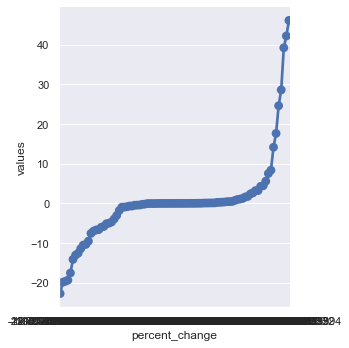

In [35]:
sns.catplot(x='percent_change', y='values', data=df7, kind='point')

In [31]:
# Now to do something much simpler
# we are going to create a dataframe with the columns we want

df10 = df[['name','quote.USD.price','timestamp']]
df10 = df10.query("name == 'Bitcoin'")
df10

,name,quote.USD.price,timestamp
0,Bitcoin,19176.10416,2022-09-26 18:58:11.607284
0,Bitcoin,19186.85155,NaT
0,Bitcoin,19186.85155,NaT
